Esses testes foram realizados utilizando 4 GPUs e o quantizador Padrão

# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o dataset principal

In [2]:
#Importing dataset
df = pd.read_csv("replication.csv")
df.head()

,nprobe,Name,Method,Dim,N_sample,nList,DB Size (GB),Time kNN,Recall@10,Total,Train time,Add time,Erro,Move time
0,0.0,SK-1M-12d,brute,12.0,1000000.0,0.0,0.048,9.598725,-,9.598725,NaN,NaN,NaN,NaN
1,5.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,0.430006,0.3715344,3.540977,1.944657,1.166315,NaN,NaN
2,10.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,0.669890,0.5688079,3.535033,1.825114,1.040028,NaN,NaN
3,25.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,1.330519,0.8745657,4.323131,1.807993,1.184619,NaN,NaN
4,50.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,2.373800,0.9817824,5.517998,1.844121,1.300076,NaN,NaN


In [3]:
try:
    df.drop('Recall@-',axis=1,inplace=True)
except:
    print("Já removido")

Já removido


In [4]:
df.dtypes

nprobe          float64
Name             object
Method           object
Dim             float64
N_sample        float64
nList           float64
DB Size (GB)    float64
Time kNN        float64
Recall@10        object
Total           float64
Train time      float64
Add time        float64
Erro             object
Move time       float64
dtype: object

# Separando no dataset para o método bruto

In [5]:
#Getting the brute results
df_brute = df[df['Method'] == 'brute']
df_brute.head()

,nprobe,Name,Method,Dim,N_sample,nList,DB Size (GB),Time kNN,Recall@10,Total,Train time,Add time,Erro,Move time
0,0.0,SK-1M-12d,brute,12.0,1000000.0,0.0,0.048,9.598725,-,9.598725,NaN,NaN,NaN,NaN
19,0.0,SK-10M-12d,brute,12.0,10000000.0,0.0,0.480,881.312736,-,881.312736,NaN,NaN,NaN,NaN
38,0.0,SK-20M-12d,brute,12.0,20000000.0,0.0,0.960,3540.154815,-,3540.154815,NaN,NaN,NaN,NaN
57,0.0,SK-30M-12d,brute,12.0,30000000.0,0.0,1.440,7976.501085,-,7976.501085,NaN,NaN,NaN,NaN
76,0.0,SK-40M-12d,brute,12.0,40000000.0,0.0,1.920,20888.665000,-,20888.665000,0.0,0.0,NaN,0.0


# Separando no dataset para o método flat

In [6]:
#Getting the IVFFlat results
df_flat = df[df['Method'] == 'ivfflat']
df_flat

,nprobe,Name,Method,Dim,N_sample,nList,DB Size (GB),Time kNN,Recall@10,Total,Train time,Add time,Erro,Move time
1,5.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,0.430006,0.3715344,3.540977,1.944657,1.166315,NaN,NaN
2,10.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,0.669890,0.5688079,3.535033,1.825114,1.040028,NaN,NaN
3,25.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,1.330519,0.8745657,4.323131,1.807993,1.184619,NaN,NaN
4,50.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,2.373800,0.9817824,5.517998,1.844121,1.300076,NaN,NaN
5,75.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,3.363997,0.9953888,6.283172,1.809944,1.109230,NaN,NaN
6,100.0,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,0.048,4.385422,0.9974406,7.228781,1.794939,1.048420,NaN,NaN
20,5.0,SK-10M-12d,ivfflat,12.0,10000000.0,16384.0,0.480,8.692132,0.35890395,38.397070,16.119184,13.585755,NaN,NaN
21,10.0,SK-10M-12d,ivfflat,12.0,10000000.0,16384.0,0.480,14.787446,0.54574378,43.632255,16.107395,12.737414,NaN,NaN
22,25.0,SK-10M-12d,ivfflat,12.0,10000000.0,16384.0,0.480,31.609494,0.84655957,61.760471,16.183013,13.967965,NaN,NaN
23,50.0,SK-10M-12d,ivfflat,12.0,10000000.0,16384.0,0.480,31.609494,0.84655957,61.760471,16.183013,13.967965,Exception thrown from index 0: Error in virtua...,NaN


# Separando para o método com o Product Quantization

In [7]:
#Getting the IVFPQ results
df_ivfpq = df[df['Method'] == 'ivfpq']
df_ivfpq

,nprobe,Name,Method,Dim,N_sample,nList,DB Size (GB),Time kNN,Recall@10,Total,Train time,Add time,Erro,Move time
7,5.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,0.392316,0.3469769,19.245509,17.716123,1.137070,NaN,NaN
8,10.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,0.558754,0.51005,17.541098,15.819927,1.162417,NaN,NaN
9,25.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,1.028464,0.7384081,20.103770,17.625190,1.450116,NaN,NaN
10,50.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,1.709389,0.8137455,20.263239,17.398073,1.155777,NaN,NaN
11,75.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,2.406827,0.8235439,21.161880,17.559874,1.195179,NaN,NaN
12,100.0,SK-1M-12d,ivfpq,12.0,1000000.0,4096.0,0.048,3.130001,0.8250467,21.771366,17.441517,1.199848,NaN,NaN
26,5.0,SK-10M-12d,ivfpq,12.0,10000000.0,16384.0,0.480,5.501286,0.33369493,54.185853,34.882726,13.801841,NaN,NaN
27,10.0,SK-10M-12d,ivfpq,12.0,10000000.0,16384.0,0.480,8.029583,0.48618809,55.307703,32.802595,14.475525,NaN,NaN
28,25.0,SK-10M-12d,ivfpq,12.0,10000000.0,16384.0,0.480,13.516227,0.70469115,62.160421,34.654335,13.989859,NaN,NaN
29,50.0,SK-10M-12d,ivfpq,12.0,10000000.0,16384.0,0.480,25.240285,0.78687095,72.334332,33.061738,14.032310,NaN,NaN


# Plotando Gráficos

In [8]:
df_g = df[df['Erro'].isna()]

In [9]:
df_g = df_g[df_g['Method'] != 'brute']

## Training

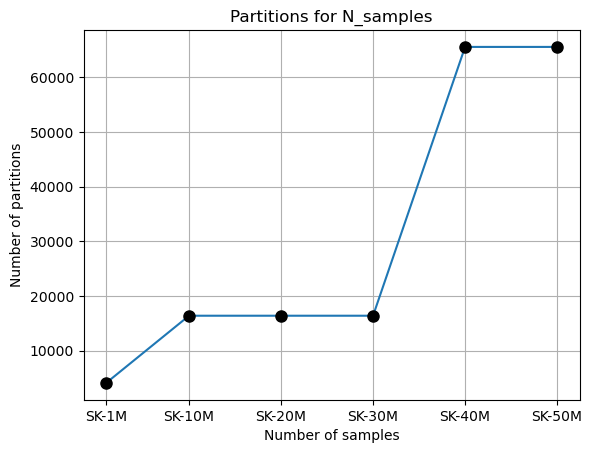

In [10]:
import math
def nlist(n):
    y = int( 2 ** ( 2 * round(math.log(n,10)) ) )
    return y

y = np.vectorize(nlist)
x = [int(1e6),int(1e7),int(2e7),int(3e7),int(4e7),int(5e7)]
plt.plot(x
,y(x),marker='o',markersize=8,markerfacecolor='black',markeredgecolor='black',linestyle='-'
)


x = [int(1e6),int(10e6),int(20e6),int(30e6),int(40e6),int(50e6)]
labels = ['SK-1M', 'SK-10M', 'SK-20M', 'SK-30M',
   'SK-40M', 'SK-50M']
plt.xticks(x, labels)

plt.xlabel('Number of samples')

plt.ylabel(f"Number of partitions")
plt.title(f'Partitions for N_samples')
plt.grid('on')



plt.show()


## Função para plotar gráfico do dataframe

In [11]:
nprobes = df[(df['Method'] == 'ivfflat') & (df['Name'] == 'SK-50M-12d')]['nprobe'].unique()

In [12]:
len(nprobes)

0

In [13]:
def plot_2df(df,db,col):
    
    try:
        df = df.astype({"Time kNN": float, "Recall@10": float})
    except:
        print("O que aconteceu")
        pass
    colors = ['red','green','orchid']

    methods = ['ivfflat','ivfpq','ivfsq']
    
    fig = plt.figure(figsize=[7,5])

    
    
    for index,method in enumerate(methods):
        nprobes = df[(df['Method'] == method) & (df['Name'] == db)]['nprobe'].unique()
        
        if len(nprobes) > 0:
            plt.plot(nprobes,df[(df['Method'] == method) & (df['Name'] == db)][col],
                label=method.upper(),marker='o',markersize=8,color=colors[index],markerfacecolor='black',
                markeredgecolor='black',linestyle='-'
            )


    



    plt.legend(loc ="lower right")

    x = [5,10,25,50,75,100]
    labels = x
    plt.xticks(x, labels)
    
    plt.xlabel('Nprobes')
    string = ''
    if col != 'Recall@10':
        string = ' (s)'
    plt.ylabel(f"{col}{string}")
    plt.title(f'{db}')
    plt.grid('on')
    


    plt.show()


## Gráfico do Brute

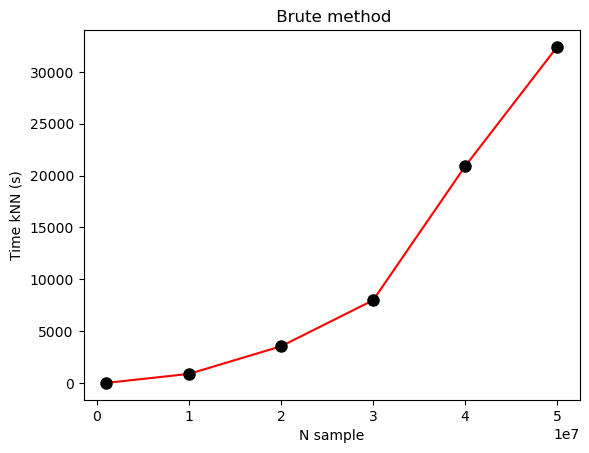

In [14]:
def plot_brute(df):
    df = df.astype({"Time kNN": float,"N_sample": int})
    plt.plot(df['N_sample'],df['Time kNN']
        ,marker='o',markersize=8,color='red',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
    )
    
    plt.title(f' Brute method')
    plt.ylabel('Time kNN (s)')
    plt.xlabel('N sample')
    
    
    
plot_brute(df_brute)

## Gráficos

### 1 MILHAO

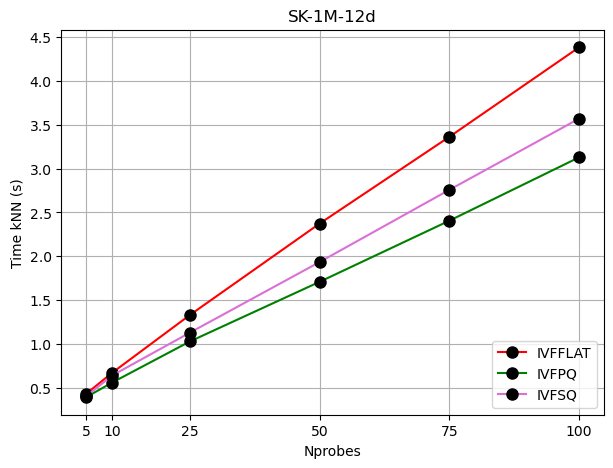

In [15]:
plot_2df(df_g,'SK-1M-12d','Time kNN')

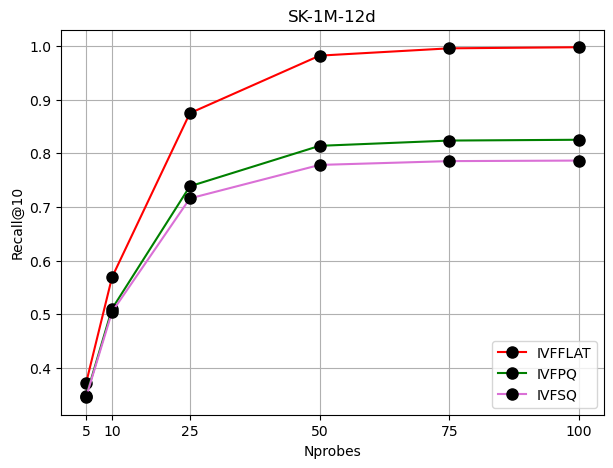

In [16]:
plot_2df(df_g,'SK-1M-12d','Recall@10')

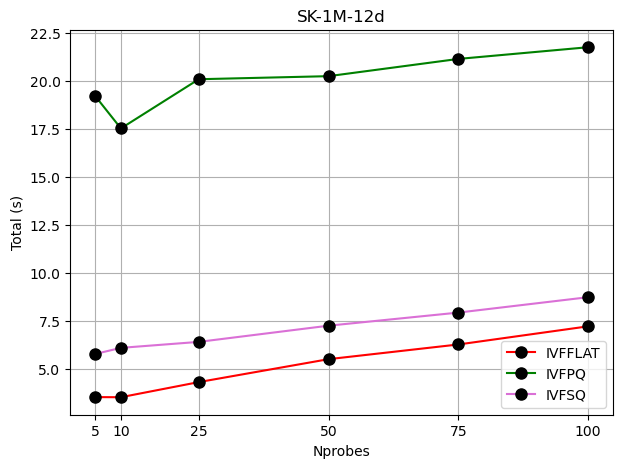

In [17]:
plot_2df(df_g,'SK-1M-12d','Total')

### 10 MILHÃO

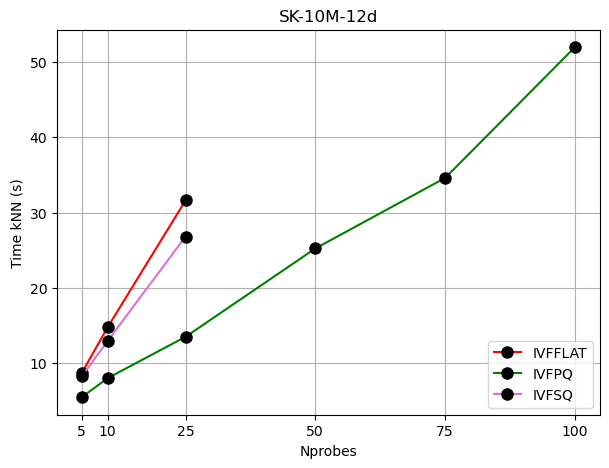

In [18]:
plot_2df(df_g,'SK-10M-12d','Time kNN')

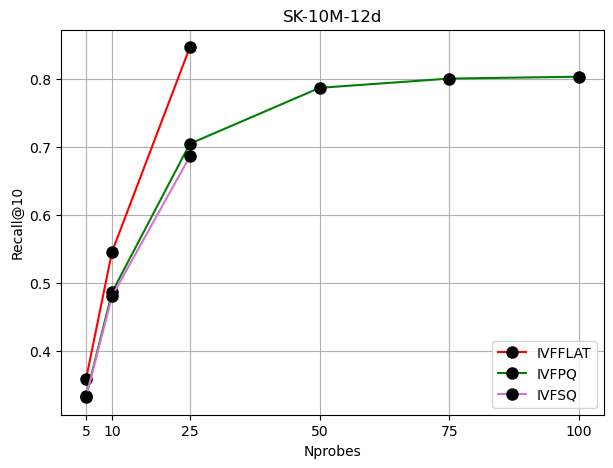

In [19]:
plot_2df(df_g,'SK-10M-12d','Recall@10')

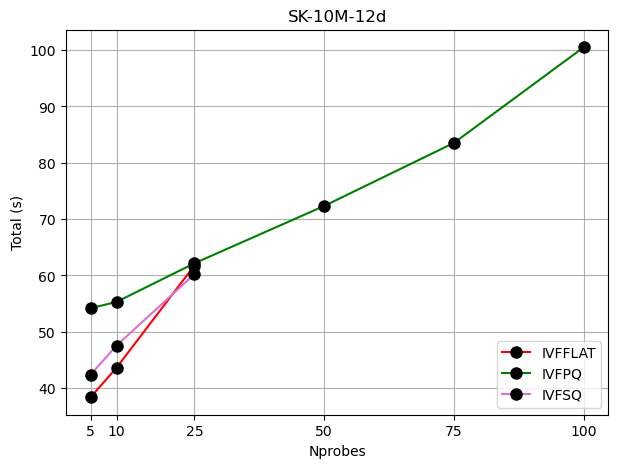

In [20]:
plot_2df(df_g,'SK-10M-12d','Total')

### 20 MILHÃO

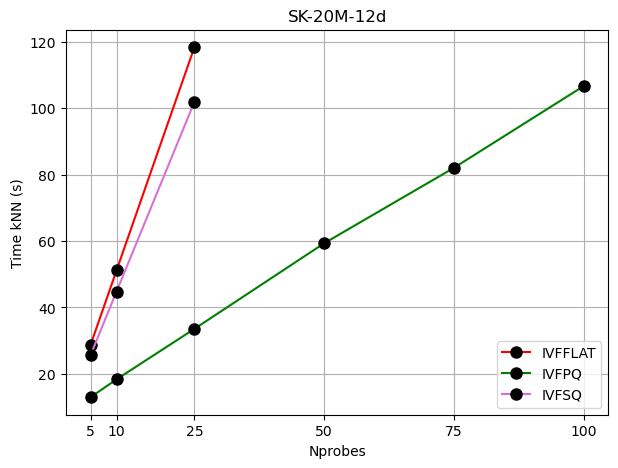

In [21]:
plot_2df(df_g,'SK-20M-12d','Time kNN')

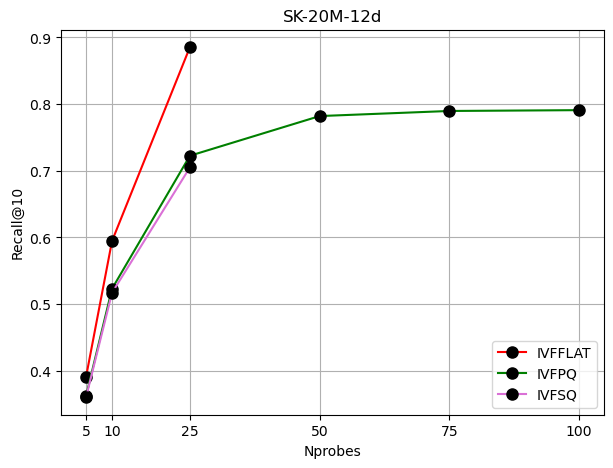

In [22]:
plot_2df(df_g,'SK-20M-12d','Recall@10')

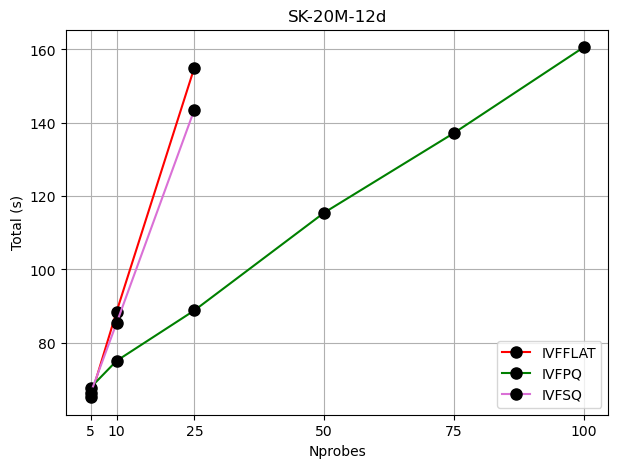

In [23]:
plot_2df(df_g,'SK-20M-12d','Total')

### 30 MILHÃO

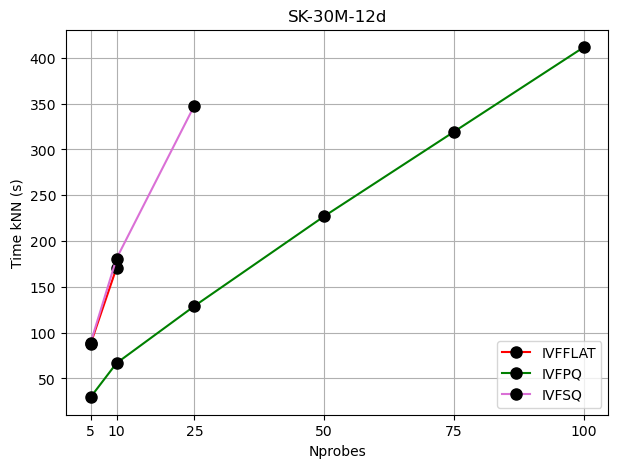

In [24]:
plot_2df(df_g,'SK-30M-12d','Time kNN')

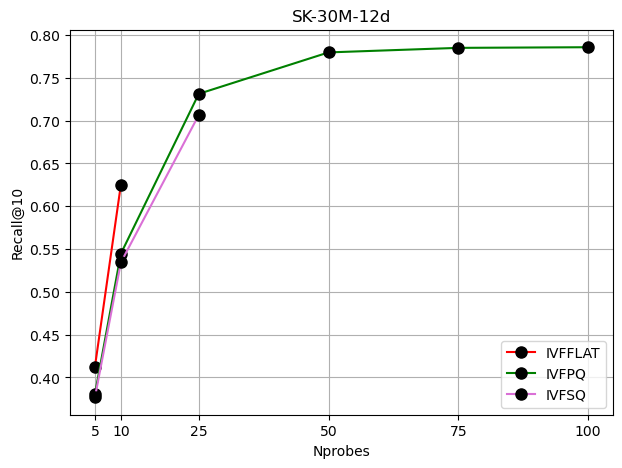

In [25]:
plot_2df(df_g,'SK-30M-12d','Recall@10')

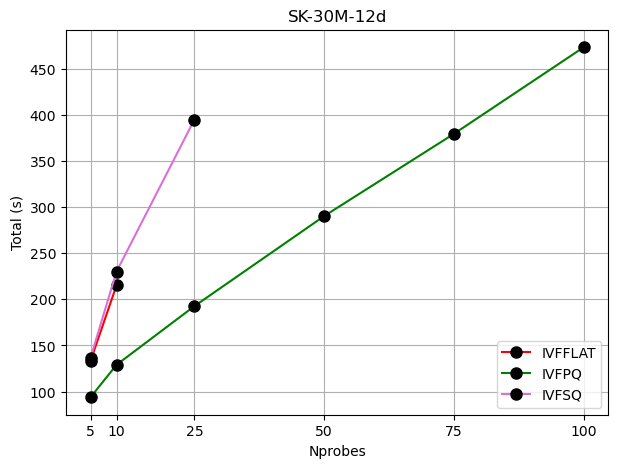

In [26]:
plot_2df(df_g,'SK-30M-12d','Total')

### 40 MILHÃO

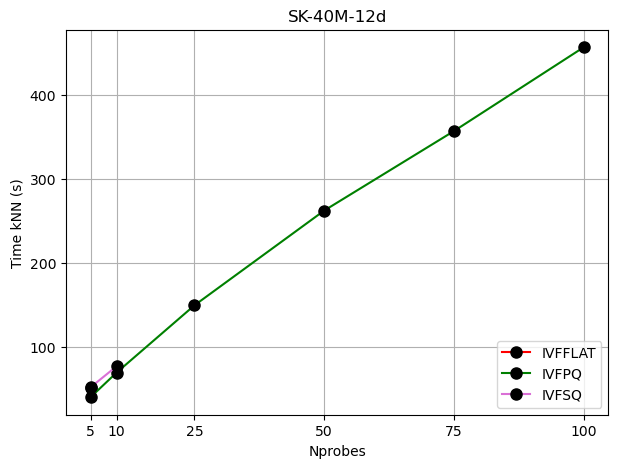

In [27]:
plot_2df(df_g,'SK-40M-12d','Time kNN')

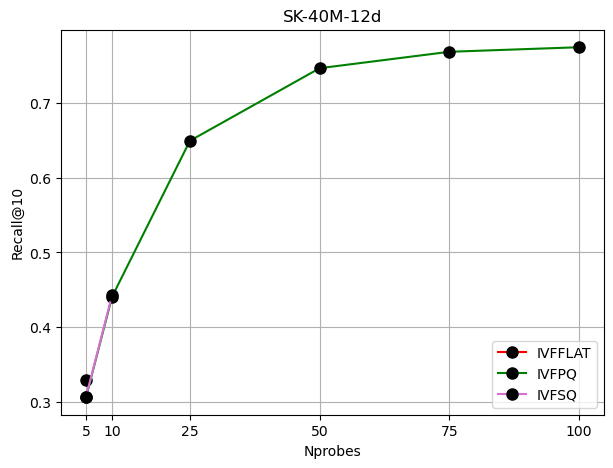

In [28]:
plot_2df(df_g,'SK-40M-12d','Recall@10')

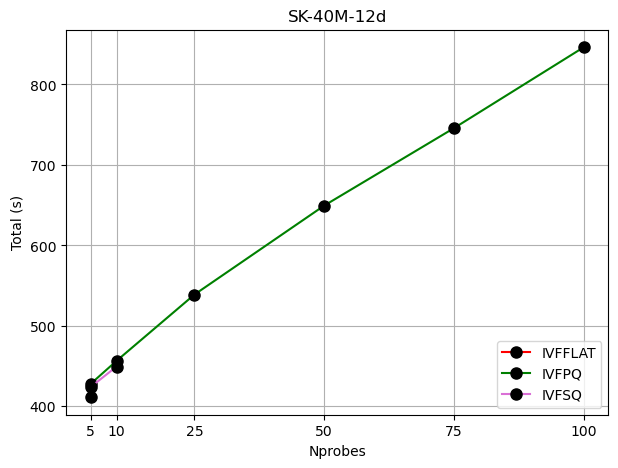

In [29]:
plot_2df(df_g,'SK-40M-12d','Total')

### 50 MILHÃO

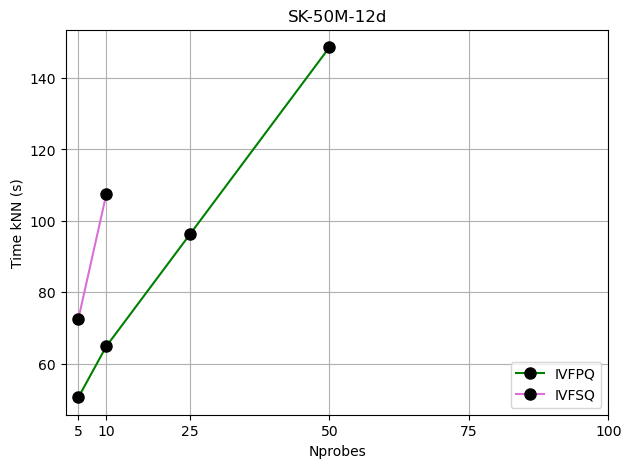

In [30]:
plot_2df(df_g,'SK-50M-12d','Time kNN')

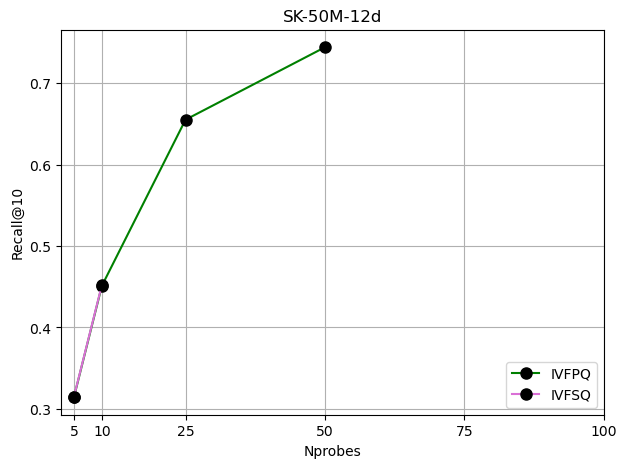

In [31]:
plot_2df(df_g,'SK-50M-12d','Recall@10')

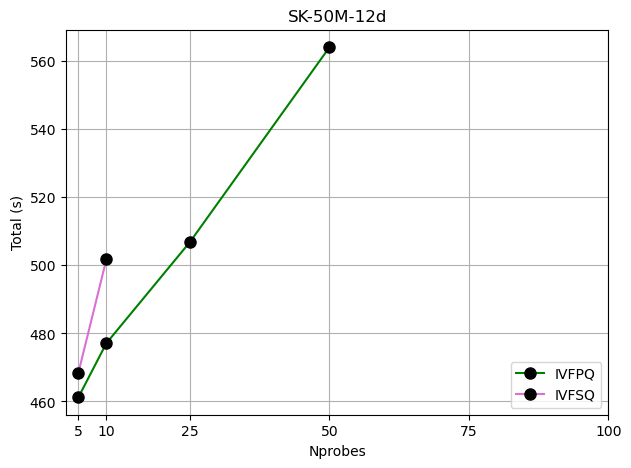

In [32]:
plot_2df(df_g,'SK-50M-12d','Total')

In [33]:
time_pq = {}
time_ff = {}
n = [int(1e6),int(1e7),int(2e7),int(3e7),int(4e7),int(5e7)]

In [34]:
method = 'ivfpq'

nprobes = [5,10,25,50,75,100]
for i in nprobes:
    aux = df_g[(df_g['Method'] == method) & (df_g['nprobe'] == i)]['Time kNN'].values
    time_pq[str(i)] = list(aux)

In [35]:
method = 'ivfflat'

nprobes = [5,10,25,50,75,100]
for i in nprobes:
    aux = df_g[(df_g['Method'] == method) & (df_g['nprobe'] == i)]['Time kNN'].values
    time_ff[str(i)] = list(aux)

In [36]:
def complexidade(t0,n0,tf,nf):
    import math
    b = tf / t0
    a = nf / n0
    
    x = math.log(b,a)
    return x

In [37]:
time_pq['5']

[0.3923161029815674,
 5.501286268234253,
 12.9508535861969,
 29.55732488632202,
 40.492,
 50.65]

In [38]:

for j in ['5','10','25','50','75','100']:
    for index,val in enumerate(time_pq[j]):
        if index == 0:
            continue

        t0 = float(time_pq[j][index-1])
        n0 = n[index-1]

        tf = float(val)
        nf = n[index]

        comp = complexidade(t0,n0,tf,nf)
        print(f"{index} -> Complexidae; {comp}")
    print("\n\n\n")

1 -> Complexidae; 1.1468281102273117
2 -> Complexidae; 1.2352063055730973
3 -> Complexidae; 2.0351193672699246
4 -> Complexidae; 1.0941690833404027
5 -> Complexidae; 1.0030978069494105




1 -> Complexidae; 1.157472370694651
2 -> Complexidae; 1.190970583468663
3 -> Complexidae; 3.1864454836538423
4 -> Complexidae; 0.15350195552313264
5 -> Complexidae; -0.32170151226317845




1 -> Complexidae; 1.1186663571400266
2 -> Complexidae; 1.3110456805068664
3 -> Complexidae; 3.323385394149224
4 -> Complexidae; 0.5202950455890982
5 -> Complexidae; -1.9837805759140195




1 -> Complexidae; 1.169253234254031
2 -> Complexidae; 1.2330493250751582
3 -> Complexidae; 3.309698922712647
4 -> Complexidae; 0.5080179174126657
5 -> Complexidae; -2.5546345811863724




1 -> Complexidae; 1.1576150471440798
2 -> Complexidae; 1.245974646925419
3 -> Complexidae; 3.3505382987447265
4 -> Complexidae; 0.3930193984581379




1 -> Complexidae; 1.2200514347575986
2 -> Complexidae; 1.0382109625735605
3 -> Complexidae; 3